In [38]:
import pandas as pd
# Data can be downloaded at https://www.kaggle.com/jerkeeler/age-of-empires-ii-de-match-data?select=match_players.csv
data_path_player_matches = "C:\\Users\\Kajkacz\\Documents\\Programming projects\\PJATK\\EWD\\Projekt\\Data\\match_players.csv"
data_path_matches = "C:\\Users\\Kajkacz\\Documents\\Programming projects\\PJATK\\EWD\\Projekt\\Data\\matches.csv"
# The two tables need to be merged together
data_matches = pd.read_csv(data_path_matches)
data_player_matches = pd.read_csv(data_path_player_matches)

In [39]:
# Survey match data
data_matches.tail(5)

,token,winning_team,mirror,ladder,patch,average_rating,map,map_size,num_players,server,duration
2373973,sISFop4qDvajfS8o,1,False,RM_1v1,39515,1063.0,arena,tiny,2,ukwest,0:43:56
2373974,mvDTUq1cmBkpizAB,1,False,RM_1v1,39515,1087.0,socotra,tiny,2,ukwest,0:35:33
2373975,s754Mda5Aw9Fj7Bp,2,False,RM_1v1,39515,1066.0,arabia,tiny,2,ukwest,0:28:44
2373976,5ca524a759610ffb,1,False,RM_TEAM,36906,1367.0,golden_swamp,normal,6,ukwest,0:42:49
2373977,dd94ab3b58e721ac,2,False,RM_1v1,35584,905.0,hideout,tiny,2,ukwest,0:35:40


In [40]:
#Survey match-player data
data_player_matches.tail(5)

,token,match,rating,color,civ,team,winner
7262147,fbLj1FH9uuEOKwrJ,7b2c9f1a10626f3c,1028.0,Orange,Khmer,1,False
7262148,y3ejSA1jjyy6xmjA,7b2c9f1a10626f3c,1033.0,Red,Celts,1,False
7262149,zbTDBvEsYvIao9Mm,7b2c9f1a10626f3c,1009.0,Cyan,Cumans,2,True
7262150,QXkReCWJHv7NJ8l5,f7bdb8670436f0ce,1506.0,Blue,Italians,2,False
7262151,t3PVF2l38Aj6bYjB,f153fa214dd9d069,NaN,Purple,Spanish,1,False


In [41]:
# Add rating_group column, grouping rating into buckets between 400 and 3000 with step of 200
data_player_matches['rating_group'] = pd.cut(data_player_matches.rating, bins=[g for g in range(400, 3000, 200)], include_lowest=True)
data_player_matches.head()

,token,match,rating,color,civ,team,winner,rating_group
0,rFWxLAdY6TF78xlo,axps4XstiBOmrDeG,1565.0,Red,Chinese,1,False,"(1400.0, 1600.0]"
1,zsyvxRyzLh85YIba,axps4XstiBOmrDeG,1600.0,Blue,Goths,2,True,"(1400.0, 1600.0]"
2,CHrJISNtjKDKM114,uQdosqwC7uiQ78ya,2145.0,Orange,Incas,1,False,"(2000.0, 2200.0]"
3,X147inwVdQuaegxT,uQdosqwC7uiQ78ya,2124.0,Green,Tatars,2,True,"(2000.0, 2200.0]"
4,kNckdaCe6pjKm6Au,uQdosqwC7uiQ78ya,2105.0,Red,Magyars,1,False,"(2000.0, 2200.0]"


In [42]:
# Merging both tables into one 
full_data = data_player_matches.merge(data_matches,left_on="match" , right_on="token")
print(f"There are {full_data.size} rows in merged data")

There are 137980888 rows in merged data


In [43]:
# Filter matches to 2 player games and remove columns
two_player_matches = full_data[full_data["num_players"] == 2]
columns_to_drop = ["color", "winning_team", "ladder", "patch","num_players","map_size"]
two_player_matches_filtered = two_player_matches.drop(columns_to_drop, axis=1)

In [44]:
# Drop all nan rating rows
all_size = two_player_matches_filtered.size
two_player_matches_filtered = two_player_matches_filtered.dropna(subset=['rating'])
remaining = two_player_matches_filtered.size
dropped = all_size - remaining 
dropped_percentage = int((100*dropped)/all_size)
print(f"Dropped {dropped}({dropped_percentage}%) records due to missing data, {remaining} remaining")

Dropped 2706145(6%) records due to missing data, 39665301 remaining


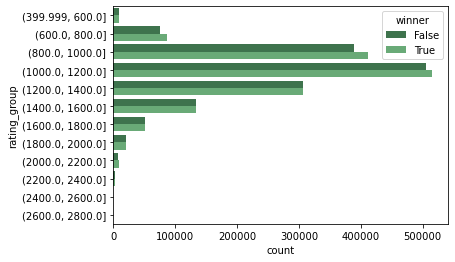

In [45]:
# Plot wins by skill threshold
import seaborn as sns
sns.countplot(y='rating_group', hue='winner', data=two_player_matches_filtered, palette="Greens_d")

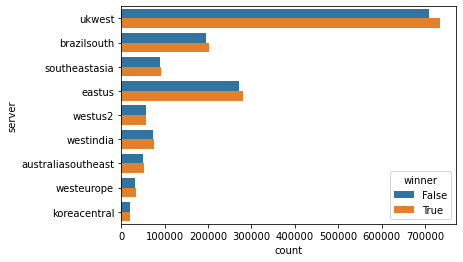

In [46]:
# Wins by country
sns.countplot(y='server', hue='winner', data=two_player_matches_filtered)

In [47]:
# Get opponent's values, drop columns that double across both sets or are unnecessary
two_player_matches_with_oppponent_data = two_player_matches_filtered.merge(two_player_matches_filtered,left_on="match" ,right_on="token_y", suffixes=['','_opponents'])
columns_to_drop = [ "token_x","match","duration_opponents","server_opponents","map_opponents","average_rating_opponents",'token_y','average_rating', 'token_x_opponents', 'match_opponents','winner_opponents','token_y_opponents', 'mirror_opponents','average_rating_opponents', 'map_opponents','server_opponents', 'duration_opponents',"rating_group_opponents","rating_group"]
two_player_matches_with_oppponent_data_filtered = two_player_matches_with_oppponent_data.drop(columns_to_drop, axis=1)



In [48]:
# Remove self-matched rows 
two_player_matches_with_oppponent_data_filtered = two_player_matches_with_oppponent_data_filtered[two_player_matches_with_oppponent_data_filtered['team'] != two_player_matches_with_oppponent_data_filtered['team_opponents']]
two_player_matches_with_oppponent_data_filtered.drop(['team','team_opponents'], axis=1)

,rating,civ,winner,mirror,map,server,duration,rating_opponents,civ_opponents
1,1565.0,Chinese,False,False,arabia,ukwest,0:34:17,1600.0,Goths
2,1600.0,Goths,True,False,arabia,ukwest,0:34:17,1565.0,Chinese
5,1731.0,Burmese,False,False,arena,ukwest,0:29:18,1585.0,Malay
6,1585.0,Malay,True,False,arena,ukwest,0:29:18,1731.0,Burmese
9,1610.0,Britons,False,True,arabia,brazilsouth,0:15:45,1623.0,Britons
...,...,...,...,...,...,...,...,...,...
5894177,847.0,Britons,True,False,hill_fort,eastus,0:20:48,845.0,Spanish
5894180,829.0,Berbers,False,False,golden_swamp,ukwest,0:25:59,846.0,Turks
5894181,846.0,Turks,True,False,golden_swamp,ukwest,0:25:59,829.0,Berbers
5894185,1493.0,Italians,True,True,islands,ukwest,0:32:09,1506.0,Italians


In [49]:
# Add column with rating difference between players to simplify dataset
two_player_matches_with_oppponent_data_filtered['rating_difference'] = two_player_matches_with_oppponent_data_filtered.apply(lambda row : row['rating'] - row['rating_opponents'], axis=1)
two_player_matches_with_oppponent_data_filtered = two_player_matches_with_oppponent_data_filtered.reindex(sorted(two_player_matches_with_oppponent_data_filtered.columns), axis=1)

two_player_matches_with_oppponent_data_filtered.tail(10)


,civ,civ_opponents,duration,map,mirror,rating,rating_difference,rating_opponents,server,team,team_opponents,winner
5894168,Ethiopians,Mongols,0:31:50,megarandom,False,902.0,17.0,885.0,ukwest,1,2,False
5894169,Mongols,Ethiopians,0:31:50,megarandom,False,885.0,-17.0,902.0,ukwest,2,1,True
5894172,Britons,Chinese,0:05:12,arena,False,819.0,0.0,819.0,ukwest,2,1,True
5894173,Chinese,Britons,0:05:12,arena,False,819.0,0.0,819.0,ukwest,1,2,False
5894176,Spanish,Britons,0:20:48,hill_fort,False,845.0,-2.0,847.0,eastus,1,2,False
5894177,Britons,Spanish,0:20:48,hill_fort,False,847.0,2.0,845.0,eastus,2,1,True
5894180,Berbers,Turks,0:25:59,golden_swamp,False,829.0,-17.0,846.0,ukwest,1,2,False
5894181,Turks,Berbers,0:25:59,golden_swamp,False,846.0,17.0,829.0,ukwest,2,1,True
5894185,Italians,Italians,0:32:09,islands,True,1493.0,-13.0,1506.0,ukwest,1,2,True
5894186,Italians,Italians,0:32:09,islands,True,1506.0,13.0,1493.0,ukwest,2,1,False


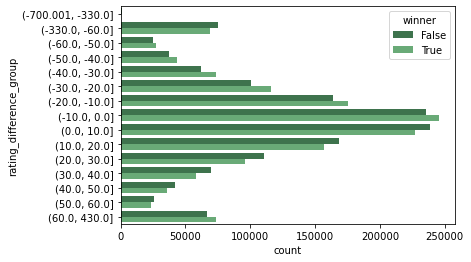

In [50]:
# Show data about winners by rating difference
import itertools
rating_difference_ranges = itertools.chain(range(-700, -60, 370), range(-60, 60, 10) , range(60, 700, 370))
two_player_matches_with_oppponent_data_filtered['rating_difference_group'] = pd.cut(two_player_matches_with_oppponent_data_filtered.rating_difference, bins=[g for g in rating_difference_ranges], include_lowest=True)

sns.countplot(y='rating_difference_group', hue='winner', data=two_player_matches_with_oppponent_data_filtered, palette="Greens_d")

In [51]:
# Get maps of all columns values for seeding 
clustering_data = two_player_matches_with_oppponent_data_filtered.drop(['rating_difference_group', 'team_opponents', 'team', 'rating', 'rating_opponents', 'mirror', 'duration'], axis = 1)
column_unique_values = {}
column_encoders = {}
for column in clustering_data.columns:
    if column == 'rating_difference':
        continue
    column_unique_values[column] = two_player_matches_with_oppponent_data_filtered[column].unique()
from sklearn import preprocessing
for column in column_unique_values.keys():
    enc = preprocessing.LabelEncoder()
    column_encoders[column] = enc.fit(column_unique_values[column])
column_encoders['civ_opponents'] = column_encoders['civ']

In [52]:
import random
import numpy as np
 
def calculate_distance(centroid, civs, civs_opp, maps, servers, ratings):
    """Own implementation clustering
    Plotting in 5 dimentional space
    Using a Hammingesque distance to define clusters 
    The civ, civ_oppoenent, map and server columns are treated as either same or different with no gradation in between, with weight 
    The rating difference is then added as a 1D distance"""
    distances = []
    weight_civ = weight_civ_opp = weight_map = weight_server = 15
    weight_map = 25
    weight_rating = 1
    c_civ, c_civ_opp, c_map, c_server, c_rating_difference = centroid        
    # Iterate over the data points and calculate the distance using the custom formula
    for civ, civ_opp, game_map, server, rating in list(zip(civs, civs_opp, maps, servers, ratings)):
        root_diff_civ = 0 if civ == c_civ else weight_civ
        root_diff_civ_opp = 0 if civ_opp == c_civ_opp else weight_civ_opp
        root_diff_map = 0 if game_map == c_map else weight_map
        root_diff_server = 0 if server == c_server else weight_server
        root_diff_rating = weight_rating * abs(abs(c_rating_difference) - abs(rating))
        distance = root_diff_civ + root_diff_civ_opp + root_diff_map + root_diff_rating#+ root_diff_server 
        distances.append(distance)
        
    return distances

def generate_centroid( value_ranges, rating_spread ):
    """Get random centroid using column_unique_values to get sample values of columns"""
    centroid = []
    centroid.append(random.choice(column_unique_values['civ']))
    centroid.append(random.choice(column_unique_values['civ_opponents']))
    centroid.append(random.choice(column_unique_values['map']))
    centroid.append(random.choice(column_unique_values['server']))
    centroid.append(abs(np.random.normal(0.0,rating_spread)))
    return centroid

def generate_centroids(count, value_ranges, rating_spread ):
    """Wrapper for getting count of centroids from generate_centroid function"""
    c = []
    for i in range(0,count):
        c.append(generate_centroid( value_ranges, rating_spread ))
    return c
    

In [53]:
import sys
def kMeansCustomStep(df,ctrds):
    """Conducts a single step of K means algorithm"""
    for i in range(0,len(ctrds)):
        sys.stdout.write("\r\tCalculating cluster %i/%i" % (i+1,len(ctrds)))
        df['C%i_Distance' % i] = calculate_distance(ctrds[i], df.civ, df.civ_opponents, df.map, df.server, df.rating_difference)
    print('\n\tGetting centroids assignment')
    df['chosen_centroid'] = df.filter(regex=("C[0-9]+_Distance")).apply(np.argmin, axis=1)
    print('\tGetting minimal distance')
    df['min_distance'] = df.filter(regex=("C[0-9]+_Distance")).apply(np.min, axis=1)
    df = df[df.columns.drop(list(df.filter(regex='C[0-9]+_Distance')))]
    return df

def getNewCentroids(ctrds,df,column_unique_values, rating_spread):
    """Genreates centroids from most popular values of previous iteration"""
    newCentroids = []
    for index,centroid in enumerate(ctrds):
        sys.stdout.write("\r\tGenerating new centroid %i/%i" % (index+1,len(ctrds)))
        cluster_data = df[df["chosen_centroid"] == index]
        newCentroid = []
        if len(cluster_data):
            newCentroid.append(cluster_data.civ.mode()[0])
            newCentroid.append(cluster_data.civ_opponents.mode()[0])
            newCentroid.append(cluster_data.map.mode()[0])
            newCentroid.append(cluster_data.server.mode()[0])
            newCentroid.append(cluster_data.rating_difference.mean())
        else:
            newCentroid = generate_centroid(column_unique_values, rating_spread)
        newCentroids.append(newCentroid)
    return newCentroids


In [56]:
# Main loop to get values for mulitple values of k an different iterations
centroids_count = 25
rating_spread = 130
clusters = pd.DataFrame(clustering_data)
clusters =clusters[clusters['rating_difference'] >= 0] 
iterations_count = 10
centroids_archive = [] 
clusters_archive = []
sse_by_k = []
for centroids_count in range(1,11):
    print("Centroid count test %i/%i" % (centroids_count+1,10))
    centroids = generate_centroids(centroids_count, column_unique_values, rating_spread)
    sse = []
    for i in range(0,iterations_count):
        print("\nIteration %i/%i" % (i+1,iterations_count))
        clusters = kMeansCustomStep(clusters, centroids)
        sse.append(np.mean(clusters["min_distance"]**2))
        centroids_archive.append(centroids)
        clusters_archive.append(pd.DataFrame.copy(clusters))
        if i != iterations_count - 1:
            centroids = getNewCentroids(centroids, clusters,column_unique_values, rating_spread)
    sse_by_k.append(sse)
# Remove superfluous columns from first iteration's record
clusters_archive[0][clusters_archive[0].columns.drop(list(clusters_archive[0].filter(regex='C[0-9]+_Distance')))]

Centroid count test 2/10

Iteration 1/3
	Calculating cluster 1/1
	Getting centroids assignment
	Getting minimal distance
	Generating new centroid 1/1
Iteration 2/3
	Calculating cluster 1/1
	Getting centroids assignment
	Getting minimal distance
	Generating new centroid 1/1
Iteration 3/3
	Calculating cluster 1/1
	Getting centroids assignment
	Getting minimal distance
Centroid count test 3/10

Iteration 1/3
	Calculating cluster 2/2
	Getting centroids assignment
	Getting minimal distance
	Generating new centroid 2/2
Iteration 2/3
	Calculating cluster 2/2
	Getting centroids assignment
	Getting minimal distance
	Generating new centroid 2/2
Iteration 3/3
	Calculating cluster 2/2
	Getting centroids assignment
	Getting minimal distance
Centroid count test 4/10

Iteration 1/3
	Calculating cluster 3/3
	Getting centroids assignment
	Getting minimal distance
	Generating new centroid 3/3
Iteration 2/3
	Calculating cluster 3/3
	Getting centroids assignment
	Getting minimal distance
	Generating new c

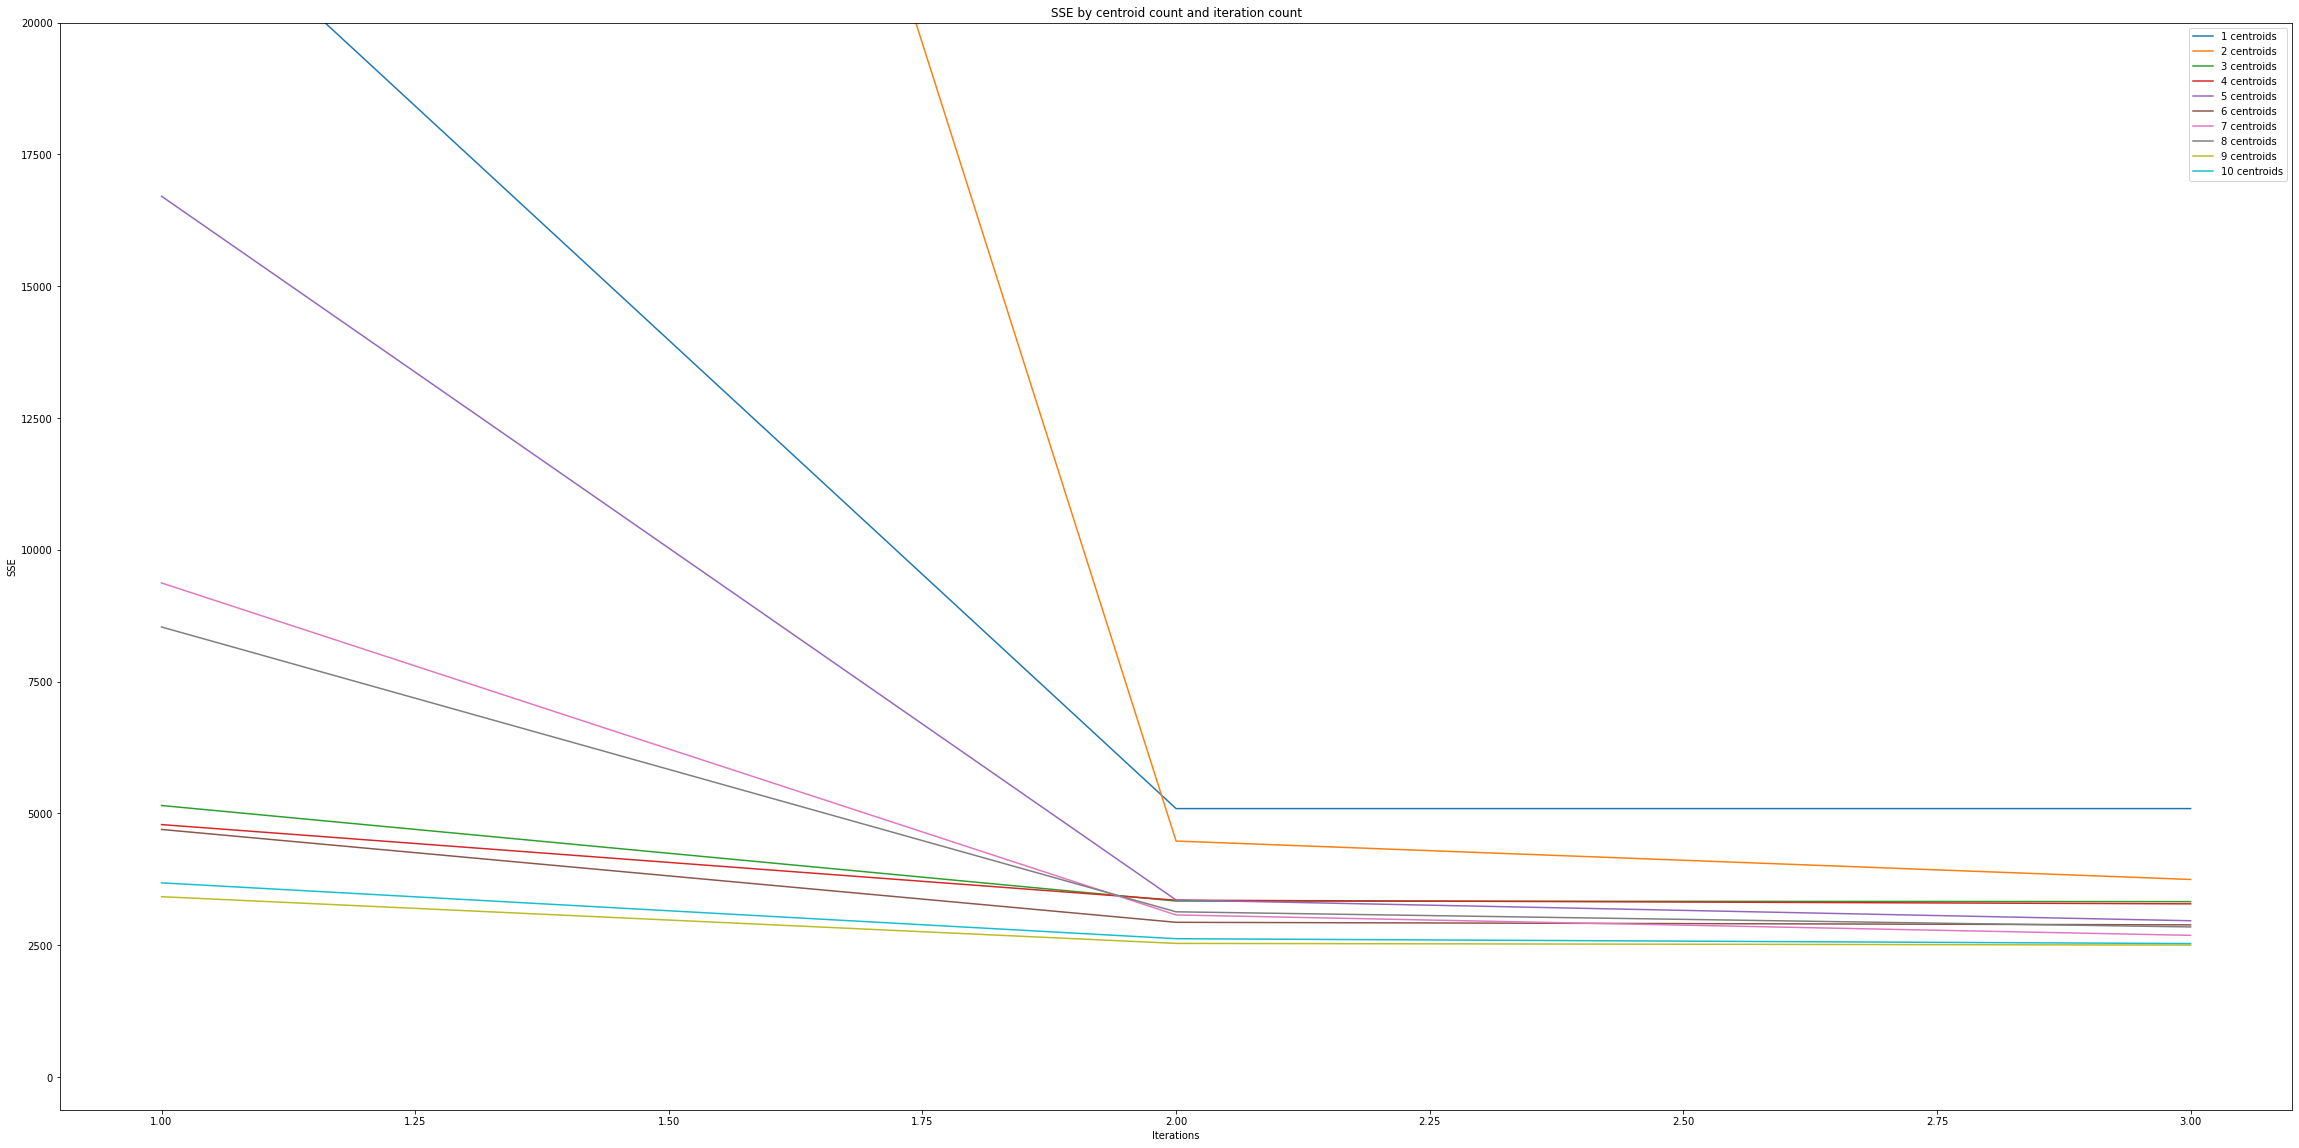

In [82]:
# Changes to sse by centroid count and iteration number
import matplotlib.pyplot as plt
offset = 0 # Set to one since first
x = range(1 + offset,iterations_count+1)
fig, ax = plt.subplots()
fig.set_size_inches(40,20)
for index,sse_set in enumerate(sse_by_k):
    plt.plot(x,sse_set[offset:],label = f"{index+1} centroids")
    plt.legend()
plt.ylim(top=20000) #ymax is your value
plt.xlabel('Iterations')
plt.ylabel('SSE')
plt.title('SSE by centroid count and iteration count')
plt.show()


In [141]:
# Check if centroids change between iterations
sse_history[sse_history["chosen_centroid_0"] != sse_history["chosen_centroid_1"] ]

,chosen_centroid_0,min_distance_0,chosen_centroid_1,min_distance_1,chosen_centroid_2,min_distance_2,chosen_centroid_3,min_distance_3,chosen_centroid_4,min_distance_4
1,82,65.253454,31,40.682573,31,25.528424,31,31.991288,31,36.286493
2,69,56.869357,16,59.893356,31,50.528424,35,51.358557,6,51.362200
5,95,69.191452,39,72.938824,39,75.623024,39,75.593002,39,70.675305
6,79,70.214218,39,72.938824,39,75.623024,39,75.593002,39,70.675305
9,82,56.746546,34,65.662768,26,51.746597,32,51.671400,32,50.710826
...,...,...,...,...,...,...,...,...,...,...
5894177,50,52.166161,23,68.760001,23,74.280439,23,78.463944,23,78.964832
5894180,63,75.474177,9,90.203464,6,89.076937,6,85.115195,6,81.637800
5894181,92,65.263713,22,68.134654,22,65.572724,22,65.227171,22,65.274438
5894185,51,50.293032,34,90.662768,34,90.853740,32,91.671400,32,90.710826


In [142]:
# Check if centroids distance changes between iterations
sse_history[sse_history["min_distance_0"] != sse_history["min_distance_1"] ]

,chosen_centroid_0,min_distance_0,chosen_centroid_1,min_distance_1,chosen_centroid_2,min_distance_2,chosen_centroid_3,min_distance_3,chosen_centroid_4,min_distance_4
1,82,65.253454,31,40.682573,31,25.528424,31,31.991288,31,36.286493
2,69,56.869357,16,59.893356,31,50.528424,35,51.358557,6,51.362200
5,95,69.191452,39,72.938824,39,75.623024,39,75.593002,39,70.675305
6,79,70.214218,39,72.938824,39,75.623024,39,75.593002,39,70.675305
9,82,56.746546,34,65.662768,26,51.746597,32,51.671400,32,50.710826
...,...,...,...,...,...,...,...,...,...,...
5894177,50,52.166161,23,68.760001,23,74.280439,23,78.463944,23,78.964832
5894180,63,75.474177,9,90.203464,6,89.076937,6,85.115195,6,81.637800
5894181,92,65.263713,22,68.134654,22,65.572724,22,65.227171,22,65.274438
5894185,51,50.293032,34,90.662768,34,90.853740,32,91.671400,32,90.710826


In [148]:
winnrate_dict = {}
for centroid in clusters["chosen_centroid"].unique():
    centroid_elements = clusters[clusters["chosen_centroid"] == centroid]
    centroid_winrate = (centroid_elements["winner"].value_counts(normalize=True).mul(100).astype(float))[1]
    print("Cluster no. %i of %i elements with %f0.00 winrate" %(centroid, len(centroid_elements), centroid_winrate))
    winnrate_dict[centroid_winrate] = centroid_elements[centroid_elements.columns.drop(list(centroid_elements.filter(regex='C[0-9]+_Distance')))]

Cluster no. 31 of 108065 elements with 49.0408550.00 winrate
Cluster no. 6 of 78089 elements with 49.8187970.00 winrate
Cluster no. 39 of 7610 elements with 49.9211560.00 winrate
Cluster no. 32 of 172885 elements with 48.8555980.00 winrate
Cluster no. 16 of 185791 elements with 51.4545910.00 winrate
Cluster no. 26 of 386266 elements with 49.9399380.00 winrate
Cluster no. 34 of 95797 elements with 49.9337140.00 winrate
Cluster no. 9 of 106933 elements with 50.4633740.00 winrate
Cluster no. 22 of 66986 elements with 49.1087690.00 winrate
Cluster no. 23 of 217488 elements with 50.0160930.00 winrate
Cluster no. 38 of 318989 elements with 49.8054790.00 winrate
Cluster no. 13 of 51326 elements with 49.6941120.00 winrate
Cluster no. 15 of 94866 elements with 50.5481420.00 winrate
Cluster no. 10 of 4445 elements with 49.8537680.00 winrate
Cluster no. 28 of 161378 elements with 49.9597220.00 winrate
Cluster no. 36 of 40173 elements with 50.8948800.00 winrate
Cluster no. 4 of 47446 elements with

In [149]:
keys = list(winnrate_dict.keys())
keys.sort()
lowest = keys[0:5]
highest = keys[-6:-1]
lowest_df = pd.concat([winnrate_dict[lowest[0]],winnrate_dict[lowest[1]],winnrate_dict[lowest[2]],winnrate_dict[lowest[3]],winnrate_dict[lowest[4]]])
highest_df = pd.concat([winnrate_dict[highest[0]],winnrate_dict[highest[1]],winnrate_dict[highest[2]],winnrate_dict[highest[3]],winnrate_dict[highest[4]]])


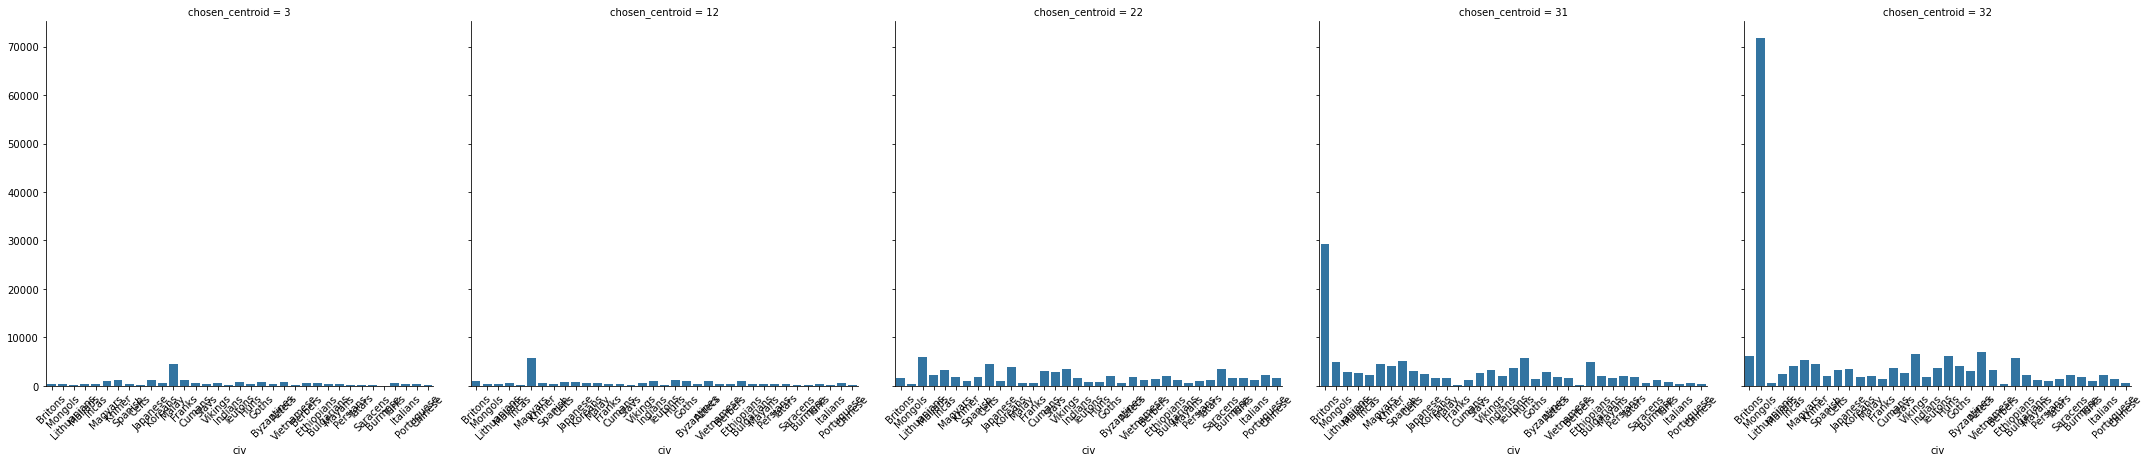

In [151]:
g = sns.FacetGrid(lowest_df, col="chosen_centroid", height=6, aspect=1)
g.map(sns.countplot,"civ")
g.set_xticklabels(rotation=45)

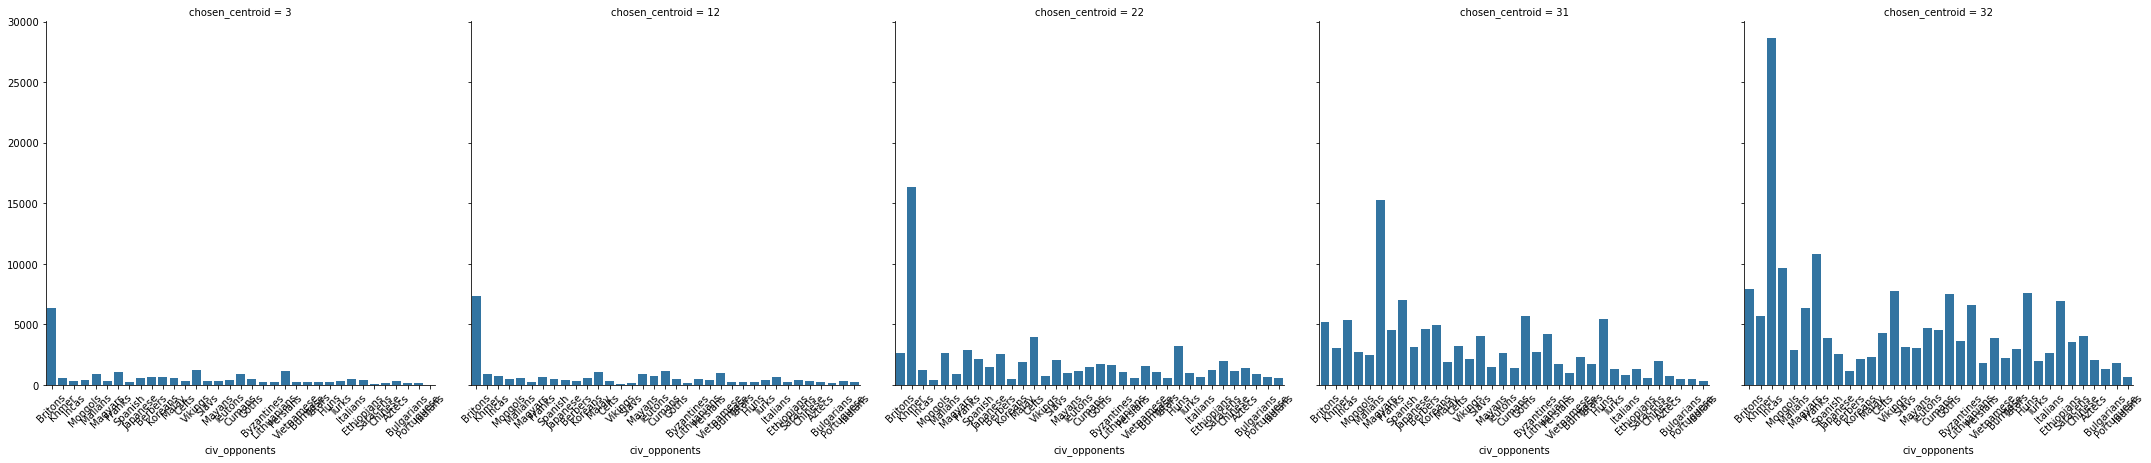

In [152]:
g = sns.FacetGrid(lowest_df, col="chosen_centroid", height=6, aspect=1)
g.map(sns.countplot, "civ_opponents")
g.set_xticklabels(rotation=45)

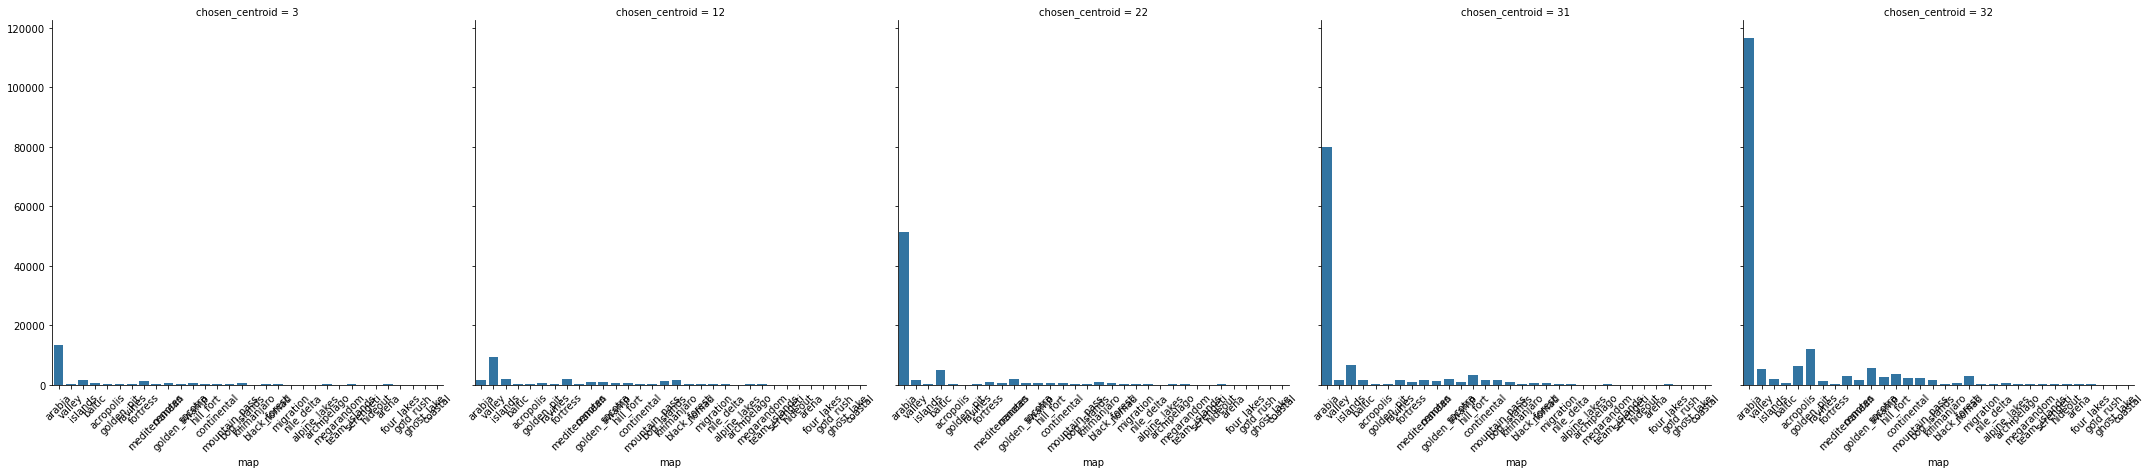

In [153]:
g = sns.FacetGrid(lowest_df, col="chosen_centroid", height=6, aspect=1)
g.map(sns.countplot, "map")
g.set_xticklabels(rotation=45)

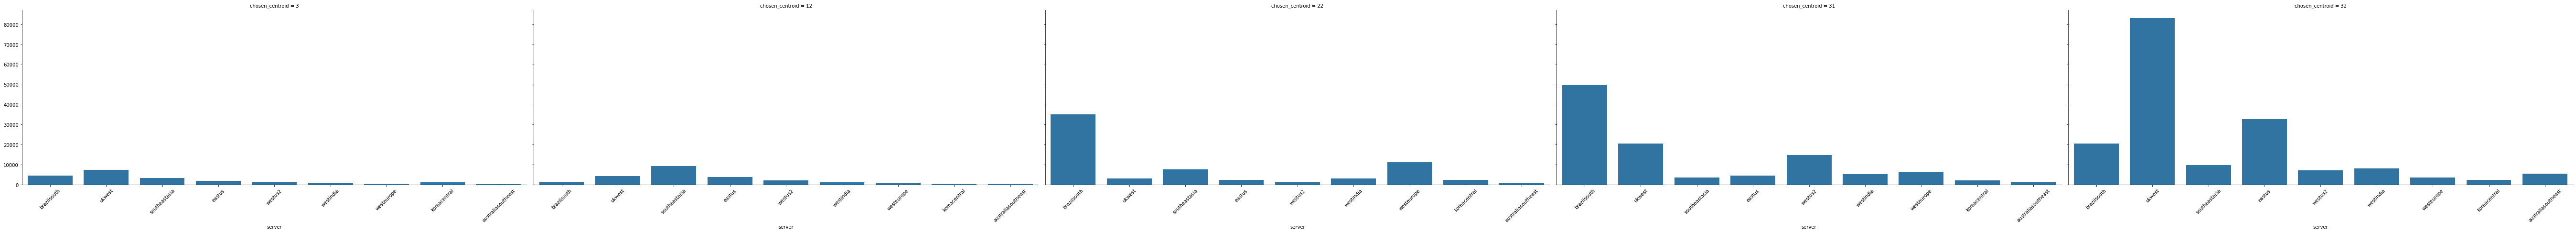

In [154]:
g = sns.FacetGrid(lowest_df, col="chosen_centroid", height=6, aspect=2.5)
g.map(sns.countplot, "server")
g.set_xticklabels(rotation=45)

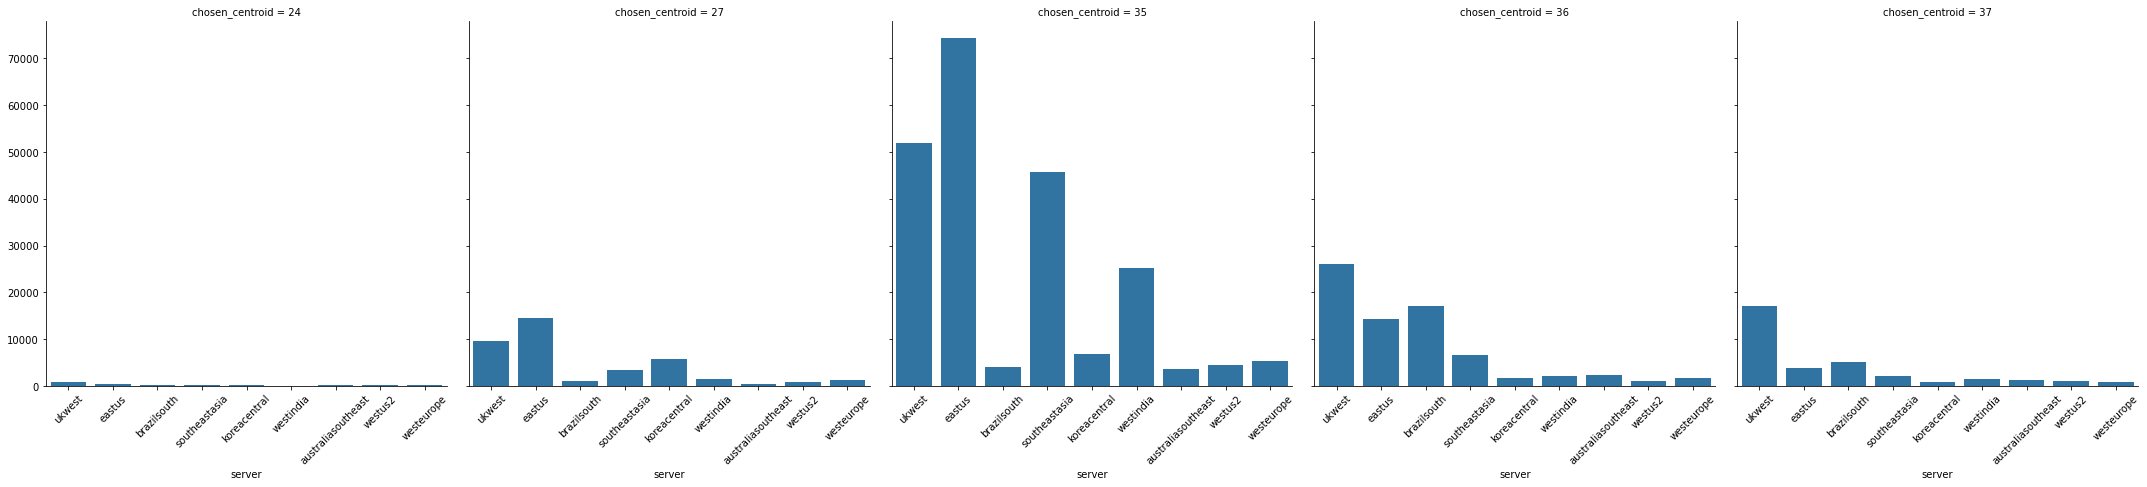

In [155]:
g = sns.FacetGrid(highest_df, col="chosen_centroid", height=6, aspect=1)
g.map(sns.countplot,"civ")
g.map(sns.countplot, "civ_opponents")
g.map(sns.countplot, "map")
g.map(sns.countplot, "server")
g.set_xticklabels(rotation=45)

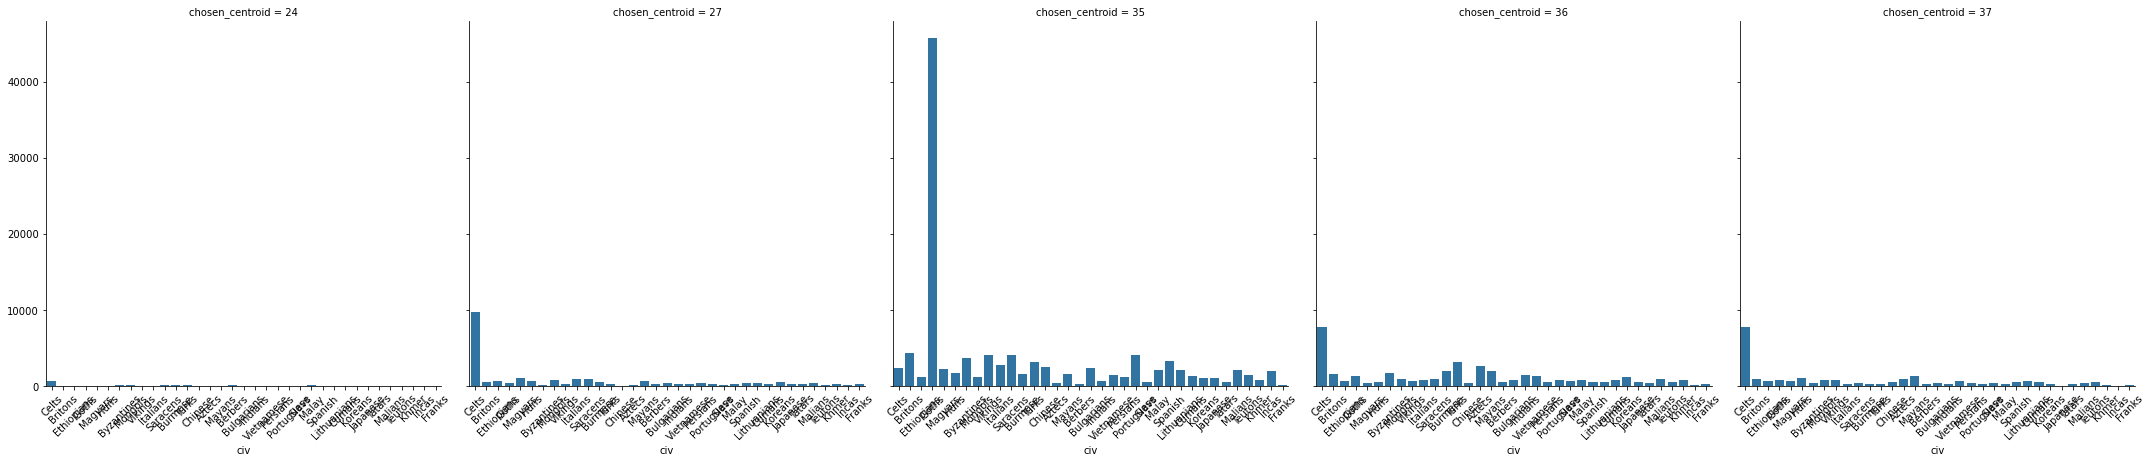

In [156]:
g = sns.FacetGrid(highest_df, col="chosen_centroid", height=6, aspect=1)
g.map(sns.countplot,"civ")
g.set_xticklabels(rotation=45)

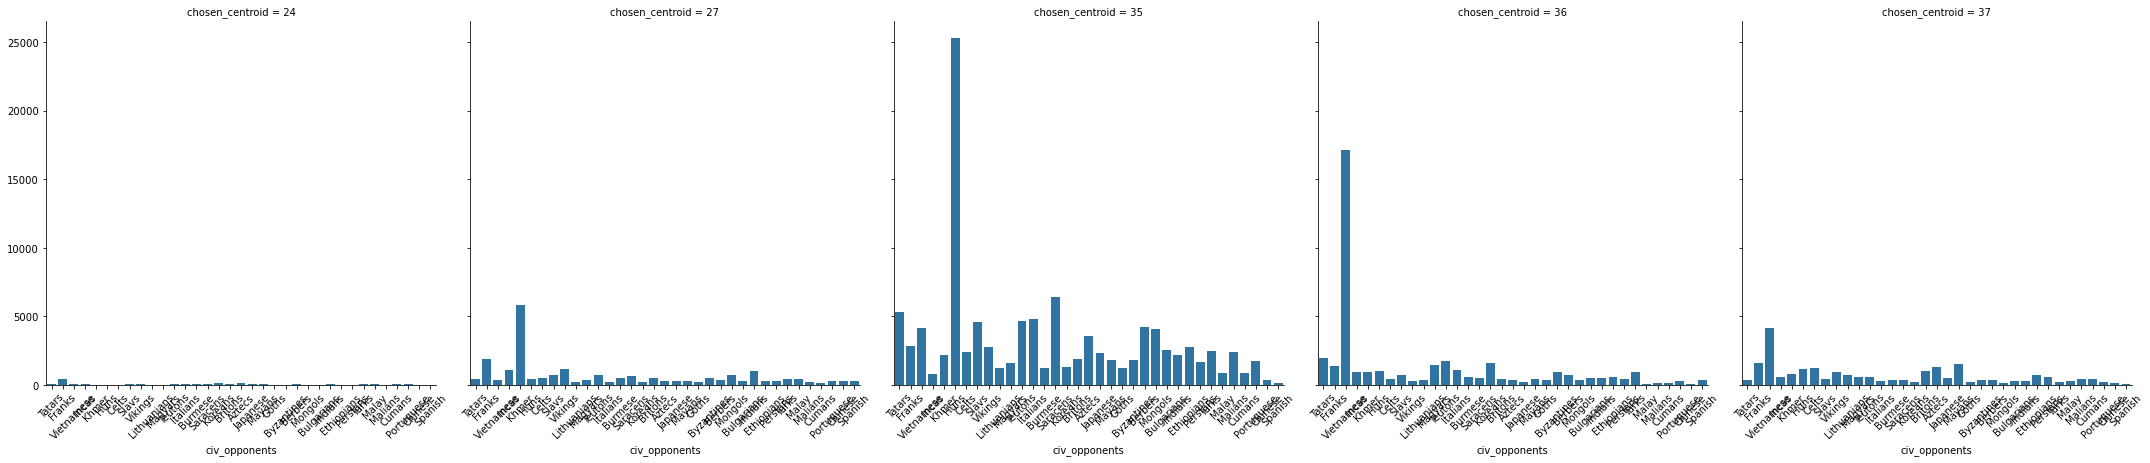

In [157]:
g = sns.FacetGrid(highest_df, col="chosen_centroid", height=6, aspect=1)
g.map(sns.countplot, "civ_opponents")
g.set_xticklabels(rotation=45)

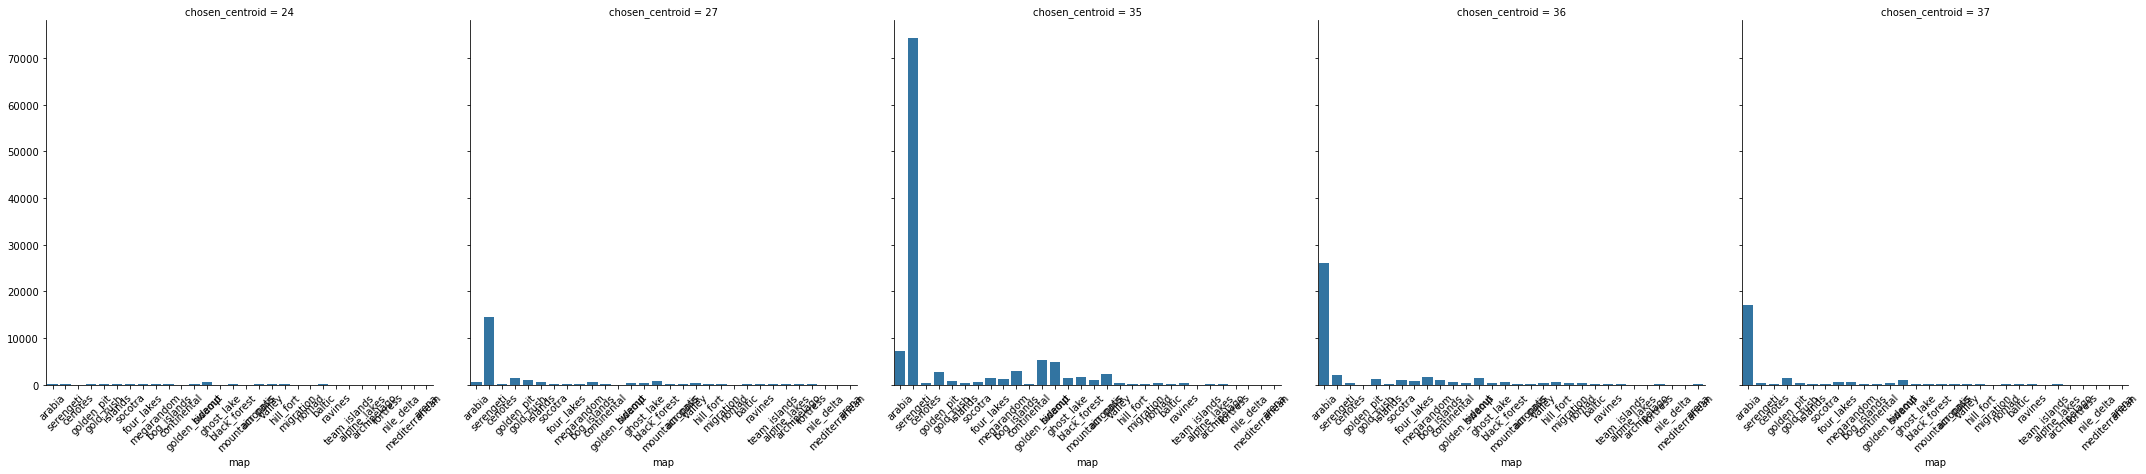

In [158]:
g = sns.FacetGrid(highest_df, col="chosen_centroid", height=6, aspect=1)
g.map(sns.countplot, "map")
g.set_xticklabels(rotation=45)

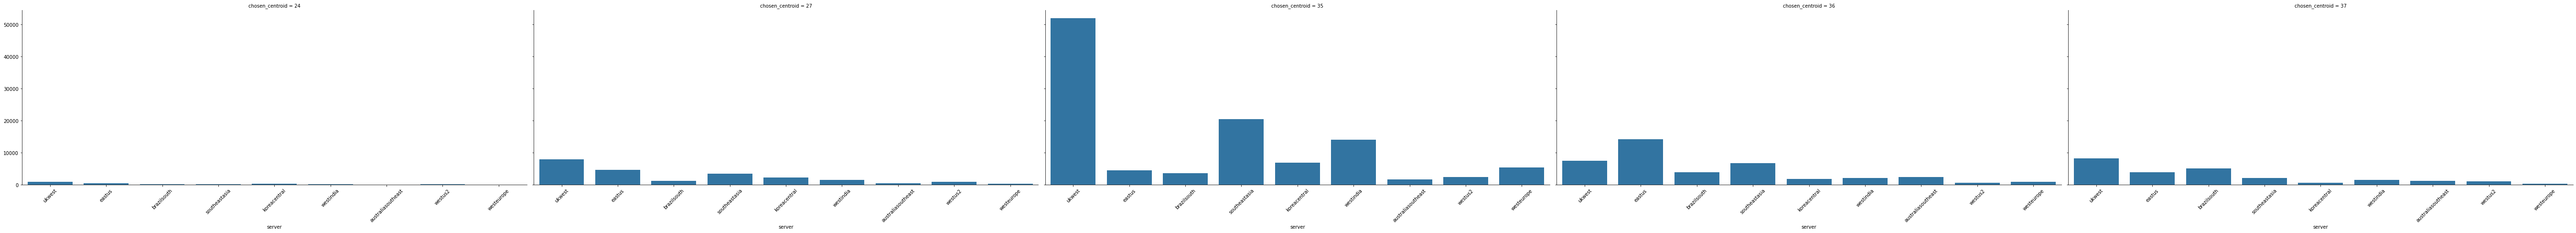

In [159]:
g = sns.FacetGrid(highest_df, col="chosen_centroid", height=6, aspect=2.5)
g.map(sns.countplot, "server")
g.set_xticklabels(rotation=45)

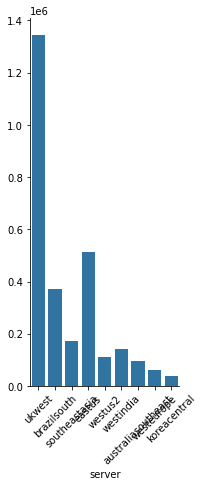

In [160]:
g = sns.FacetGrid(clusters,  height=6, aspect=0.5)
g.map(sns.countplot, "server")
g.set_xticklabels(rotation=45)

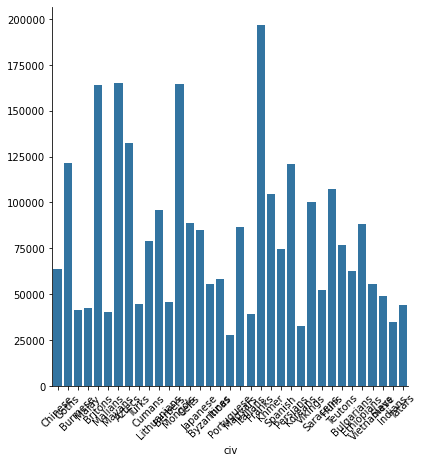

In [161]:
g = sns.FacetGrid(clusters,  height=6, aspect=1)
g.map(sns.countplot, "civ")
g.set_xticklabels(rotation=45)